In [43]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')


In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))
data[1]

array([315.        , 315.00711228, 315.01422457, ..., 345.31910877,
       345.32622105, 345.33333333])

In [6]:
hf.close

<bound method File.close of <HDF5 file "gammaray_lab4.h5" (mode r)>>

In [7]:
Data = pd.DataFrame({'time':data[0], 'Solar phase' : data[1] , 'Earth phase':data[2], 'particle counts':data[3]})

In [8]:
#Data.plot(x = 'time', y = 'particle counts',kind ='bar')

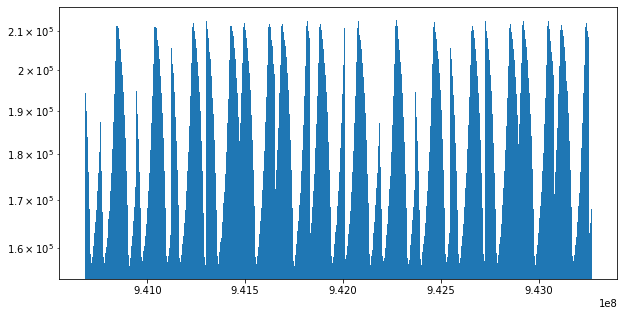

In [9]:

plt.hist(Data['time'],weights=Data['particle counts'], bins=1000)
plt.yscale('log')

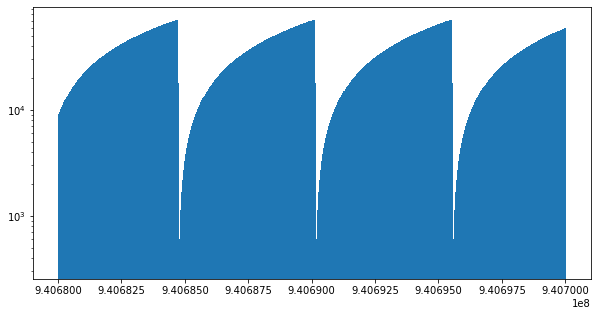

In [10]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['Earth phase'].iloc[0:200000], bins=1000)
plt.yscale('log')

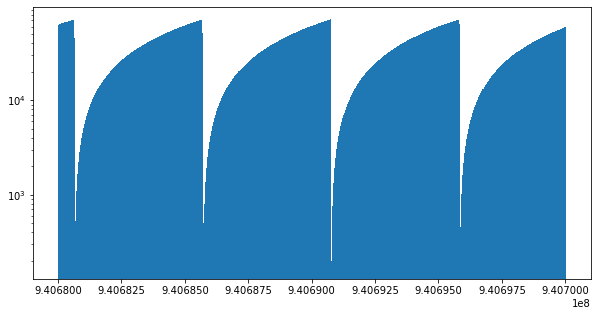

In [11]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['Solar phase'].iloc[0:200000], bins=1000)
plt.yscale('log')

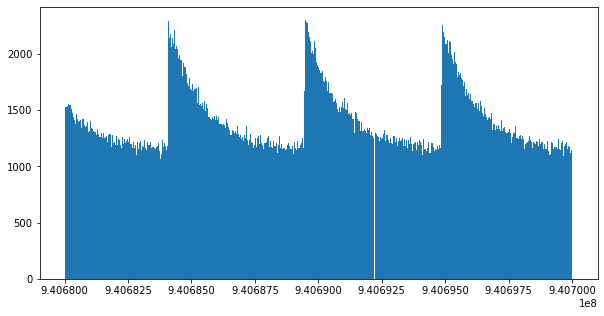

In [12]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['particle counts'].iloc[0:200000], bins=1000)
#plt.yscale('log')
plt.show()

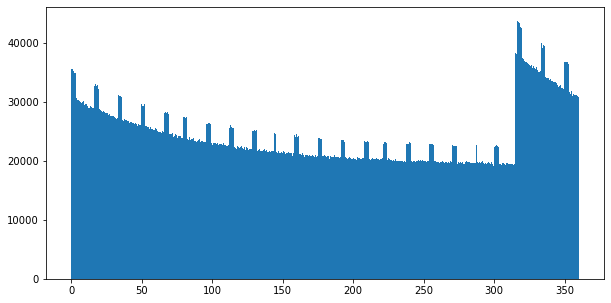

In [13]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=7500)
#plt.yscale('log')
#plt.xlim([2.95,3.05])
plt.show()

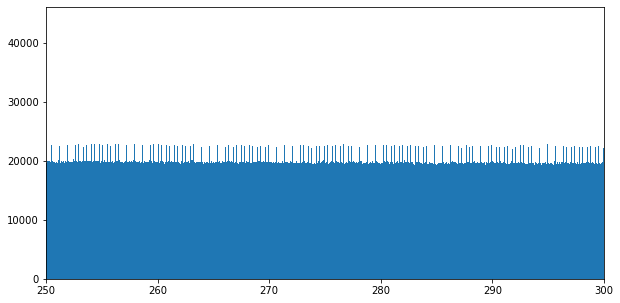

In [14]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=7500)
#plt.yscale('log')
plt.xlim([250,300])
plt.show()

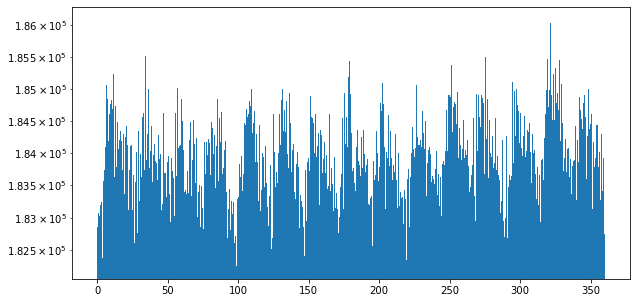

In [15]:
plt.hist(Data['Solar phase'],weights=Data['particle counts'], bins=1000)
plt.yscale('log')

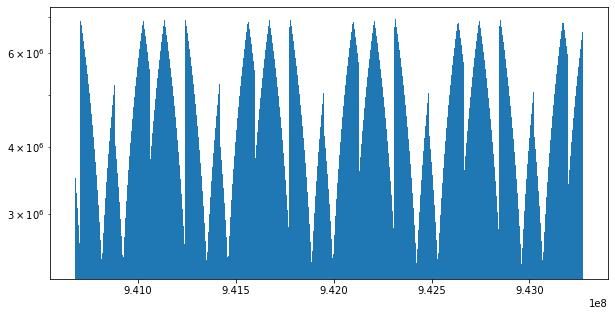

In [16]:
plt.hist(data[0],weights=data[1], bins=1000)
plt.yscale('log')
plt.show()

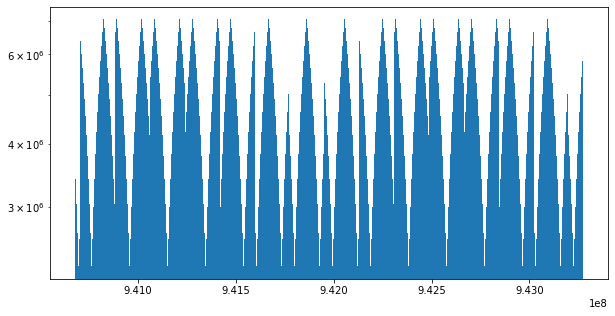

In [17]:
plt.hist(data[0],weights=data[2], bins=1000)
plt.yscale('log')
plt.show()

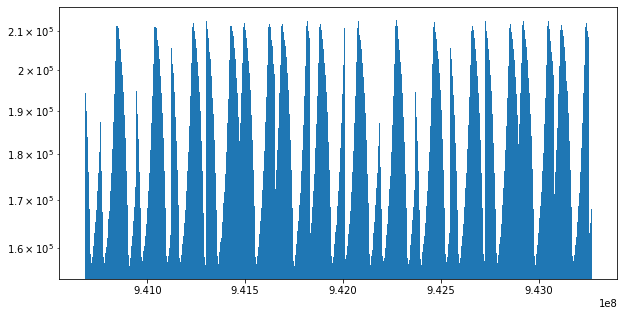

In [18]:
plt.hist(data[0],weights=data[3], bins=1000)
plt.yscale('log')
plt.show()

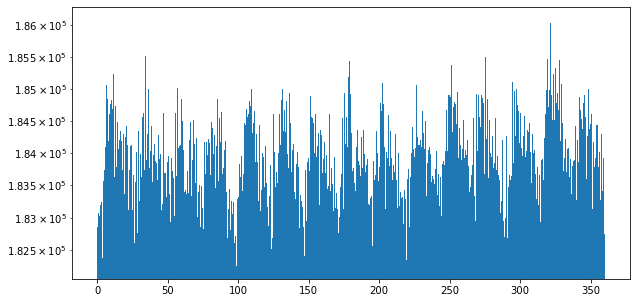

In [19]:
plt.hist(data[1],weights=data[3], bins=1000)
plt.yscale('log')
plt.show()

SO the only nexe corlatios we have is the earth phase to the parical count lets see if we can modle this so that w eknow what hte disibputn would be for evey locatios on the eaxth seface


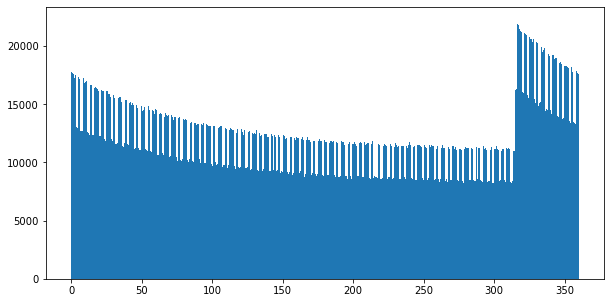

In [20]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=15000)
#plt.yscale('log')
#plt.xlim([2.95,3.05])
plt.show()

In [21]:
math.remainder(10,3)

1.0

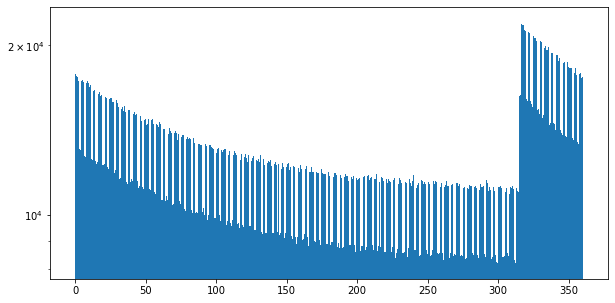

In [22]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=15000)
plt.yscale('log')
#plt.xlim([2.95,3.05])
plt.show()

In [23]:
count , bins = np.histogram(Data['Earth phase'],weights=Data['particle counts'],bins=500)
bins = np.delete(bins, 0)

In [24]:
Hist = pd.DataFrame({ 'Earth phase':bins, 'particle counts':count, 'd':np.append(np.diff(count),0)})


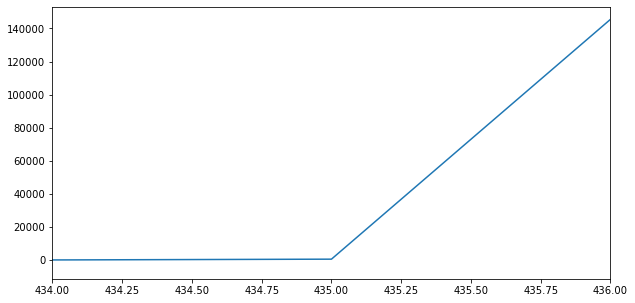

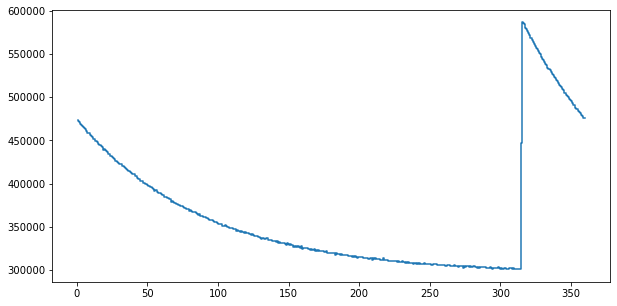

In [25]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
Hist['d'].plot()
#plt.hist(Hist['Earth phase'],weights=Hist['particle counts'], bins=15000)
#plt.yscale('log')
plt.xlim([434,436])
plt.show()
plt.matplotlib.pyplot.step(Hist['Earth phase'],Hist['particle counts'])

In [26]:
d = np.append(np.diff(count),0)
d= np.append(d,0)

In [27]:
s=np.append(Hist.loc[339:500],Hist.loc[0:335])

335
165


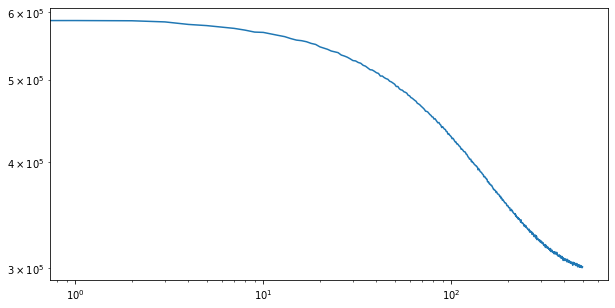

In [42]:
print(len(Hist.loc[0:334]))
print(len(Hist.loc[335:500]))
a=Hist.loc[437:500]
b=Hist.loc[0:436]
len(s)
Hist
a
shift = a.append(b)
c=shift.reset_index(drop=True)
#shift.plot()
c
c['particle counts'].plot(logy=True,logx=True)
#plt.yscale('log')


In [29]:
len(Hist.loc[0:335])

336

In [30]:
len(Hist.loc[335:500])

165

In [70]:
a=[1,1,1,1,1,1]

In [72]:
b=np.append(a,a)

In [73]:
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
I=c.index
I

RangeIndex(start=0, stop=500, step=1)

In [44]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [54]:
 popt, pcov = optimize.curve_fit(func, I, c['particle counts'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [50]:
I=c.index
I

RangeIndex(start=0, stop=500, step=1)

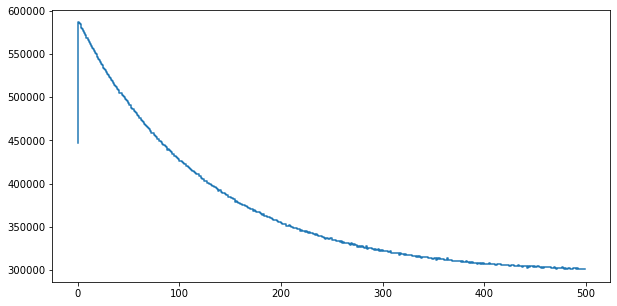

In [51]:
plt.matplotlib.pyplot.step(I,c['particle counts'])